In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import optuna

In [4]:
df=pd.read_csv("file:///F:/Health%20insu/test.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [6]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
127032    False
127033    False
127034    False
127035    False
127036    False
Length: 127037, dtype: bool

In [7]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [10]:
df.Region_Code.value_counts(normalize=True)

28.0    0.279619
8.0     0.086770
46.0    0.052016
41.0    0.048309
15.0    0.034966
30.0    0.032156
29.0    0.029739
50.0    0.026874
3.0     0.024387
11.0    0.024371
36.0    0.022820
33.0    0.020884
47.0    0.019727
35.0    0.018632
6.0     0.016302
45.0    0.015255
37.0    0.014500
18.0    0.013776
48.0    0.012540
14.0    0.012366
39.0    0.011760
10.0    0.011595
21.0    0.011060
2.0     0.010706
13.0    0.010706
12.0    0.008163
7.0     0.008139
9.0     0.007738
32.0    0.007541
27.0    0.006990
26.0    0.006880
43.0    0.006841
25.0    0.006683
24.0    0.006675
17.0    0.006597
16.0    0.005668
0.0     0.005337
31.0    0.005313
38.0    0.005124
23.0    0.005006
20.0    0.004668
4.0     0.004550
49.0    0.004377
34.0    0.004141
19.0    0.004125
22.0    0.003306
5.0     0.003298
40.0    0.003251
1.0     0.002794
44.0    0.002015
42.0    0.001543
52.0    0.000708
51.0    0.000693
Name: Region_Code, dtype: float64

In [11]:
for i in df.columns:
    if df[i].dtype=="object":
        print(df[i].value_counts())

Male      68236
Female    58801
Name: Gender, dtype: int64
1-2 Year     66699
< 1 Year     55019
> 2 Years     5319
Name: Vehicle_Age, dtype: int64
Yes    63835
No     63202
Name: Vehicle_Damage, dtype: int64


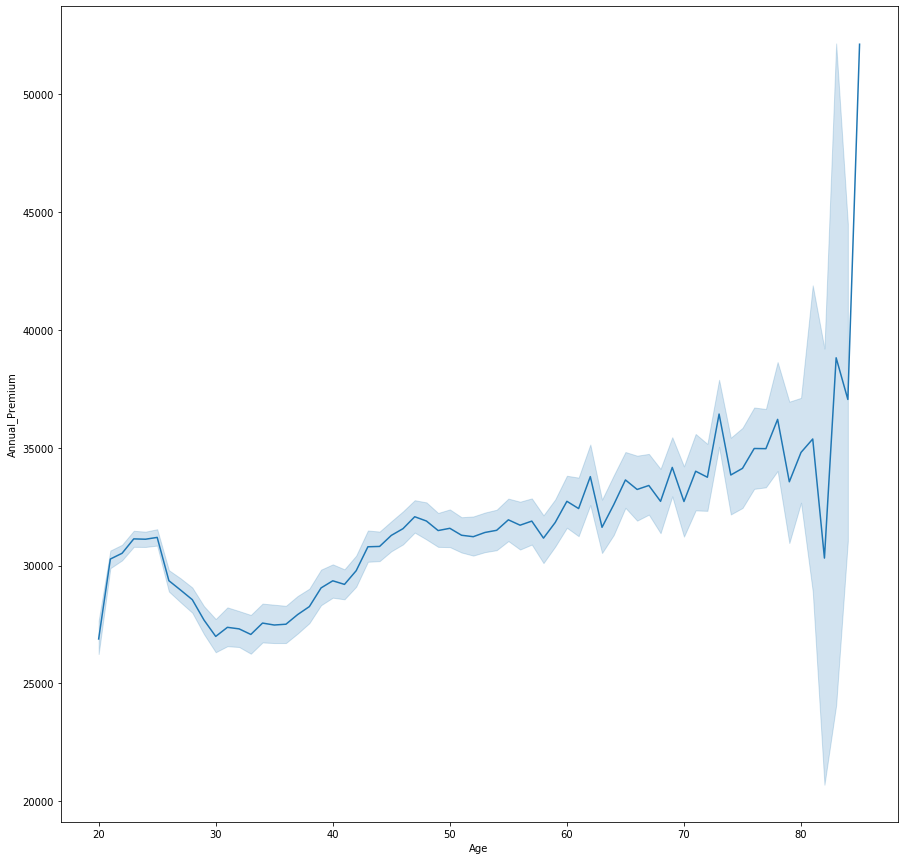

In [12]:
plt.figure(figsize=(15,15))
sns.lineplot(df["Age"],df["Annual_Premium"])

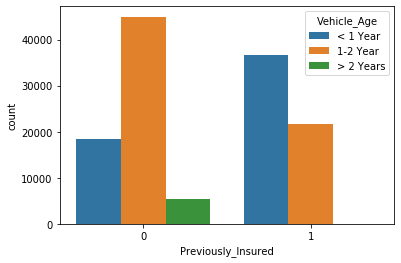

In [14]:
sns.countplot(df["Previously_Insured"],hue=df["Vehicle_Age"])

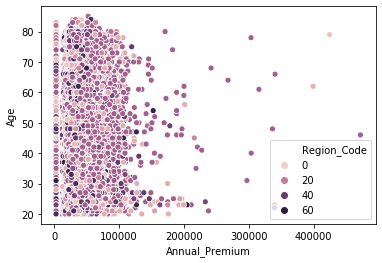

In [16]:
sns.scatterplot(df["Annual_Premium"],df["Age"],hue=df["Region_Code"])

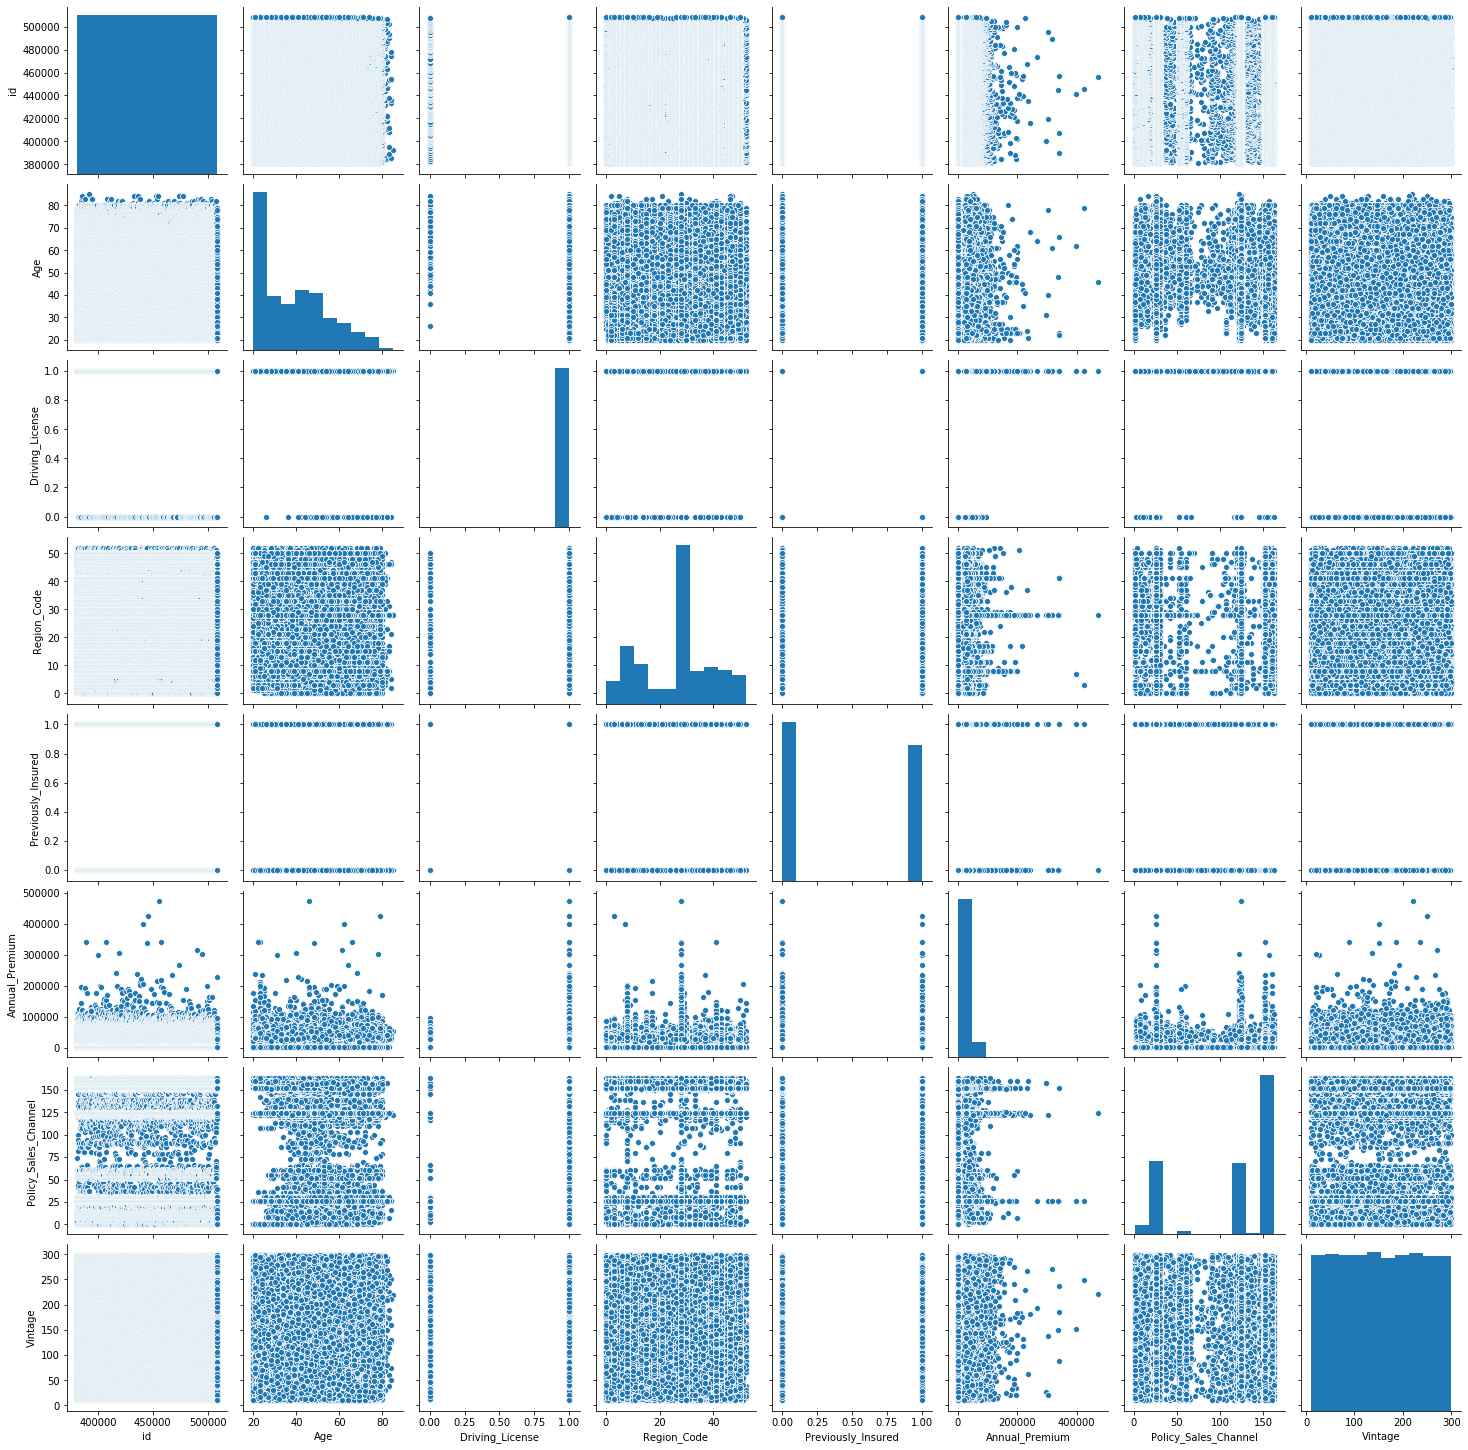

In [18]:
#sns.pairplot(df)

In [19]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
           cat.append(i)
            
    else:
            num.append(i)

In [20]:
print(cat)
print(num)

['Gender', 'Vehicle_Age', 'Vehicle_Damage']
['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [21]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
id,127037.0,444628.000000,36672.567411,381110.0,412869.0,444628.0,476387.0,508146.0
Age,127037.0,38.765903,15.465814,20.0,25.0,36.0,49.0,85.0
Driving_License,127037.0,0.998134,0.043152,0.0,1.0,1.0,1.0,1.0
Region_Code,127037.0,26.459866,13.209916,0.0,15.0,28.0,35.0,52.0
Previously_Insured,127037.0,0.460039,0.498403,0.0,0.0,0.0,1.0,1.0
Annual_Premium,127037.0,30524.643576,16945.297103,2630.0,24325.0,31642.0,39408.0,472042.0
Policy_Sales_Channel,127037.0,111.800468,54.371765,1.0,26.0,135.0,152.0,163.0
Vintage,127037.0,154.318301,83.661588,10.0,82.0,154.0,227.0,299.0


In [23]:
df[cat].describe().T

,count,unique,top,freq
Gender,127037,2,Male,68236
Vehicle_Age,127037,3,1-2 Year,66699
Vehicle_Damage,127037,2,Yes,63835


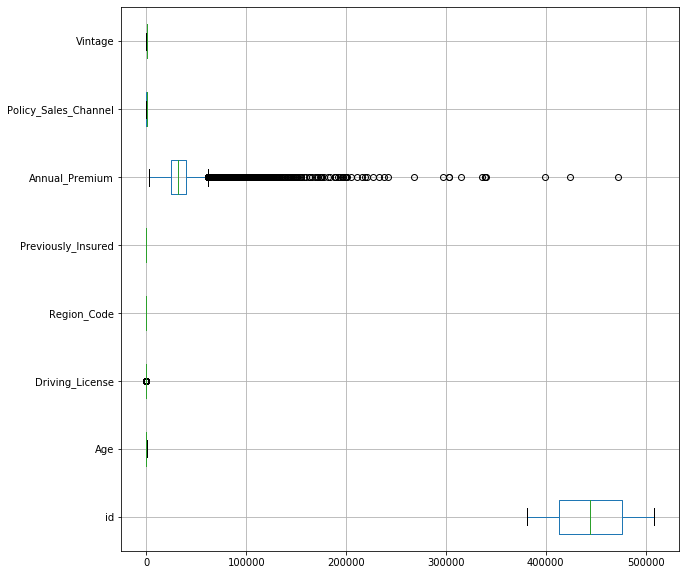

In [26]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

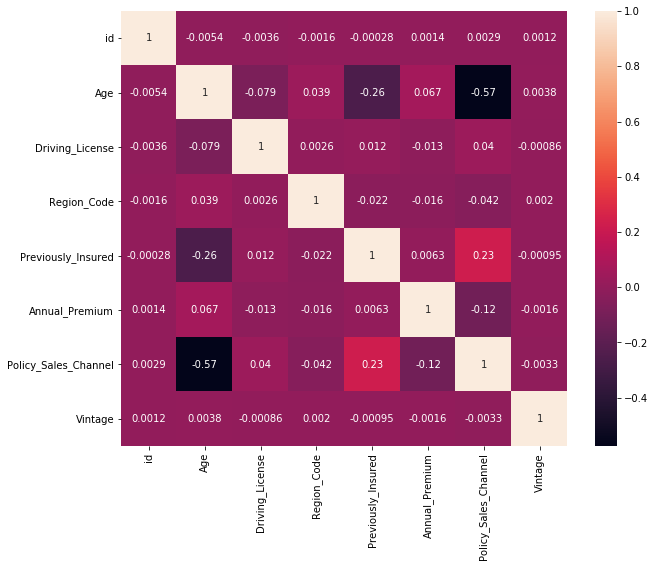

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [28]:
print(cat)

['Gender', 'Vehicle_Age', 'Vehicle_Damage']


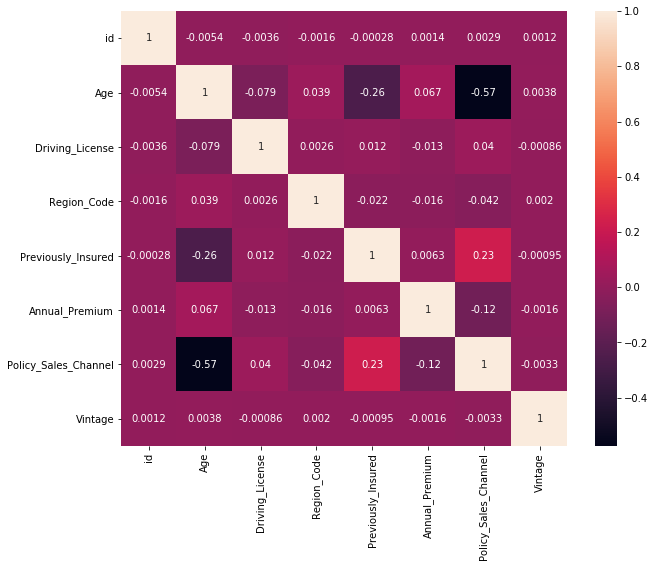

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)